/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['!series_matrix_table_end']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


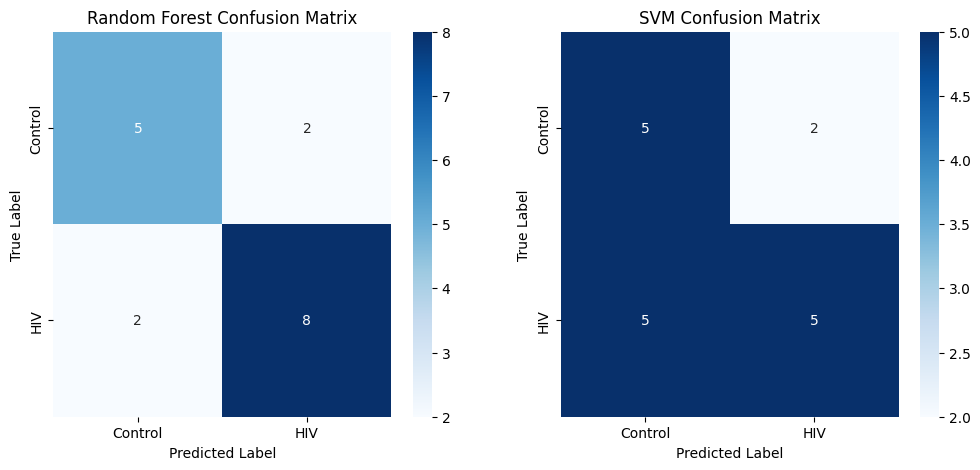

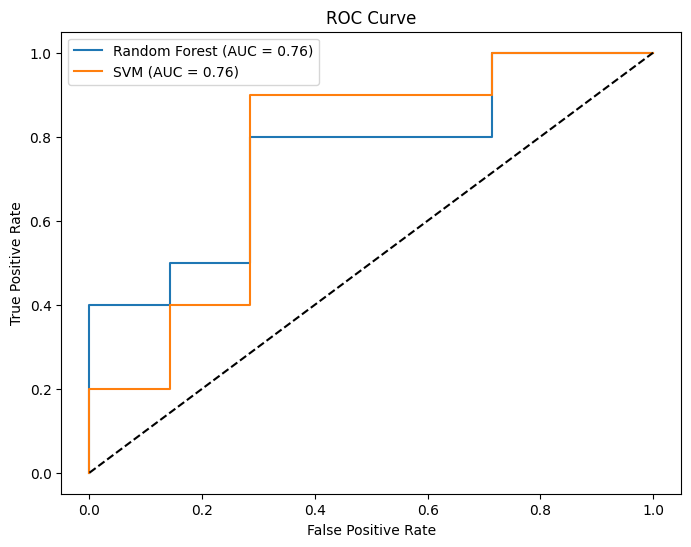


Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.71      0.71         7
           1       0.80      0.80      0.80        10

    accuracy                           0.76        17
   macro avg       0.76      0.76      0.76        17
weighted avg       0.76      0.76      0.76        17


SVM Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.71      0.59         7
           1       0.71      0.50      0.59        10

    accuracy                           0.59        17
   macro avg       0.61      0.61      0.59        17
weighted avg       0.63      0.59      0.59        17


Random Forest 10-Fold CV Accuracy: 0.72 ± 0.11
SVM 10-Fold CV Accuracy: 0.66 ± 0.15


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# Load dataset
file_path = "Merged_HIV_Data_ML.csv"  # Update with the correct file path
df = pd.read_csv(file_path)

# Drop unnecessary column (if present)
df = df.drop(columns=["Unnamed: 0"], errors='ignore')

# Set ID_REF as index if needed
df.set_index("ID_REF", inplace=True)

# Define features (X) and labels (y)
X = df.T  # Transpose so that rows are samples and columns are features
y = [0] * 34 + [1] * (X.shape[0] - 34)  # 0 for Control, 1 for HIV

# Handle missing values by replacing NaNs with the mean of each column
imputer = SimpleImputer(strategy="mean")
X_imputed = imputer.fit_transform(X)
X = pd.DataFrame(X_imputed, columns=[f"Feature_{i}" for i in range(X_imputed.shape[1])])

# Split dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize models
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
svm_model = SVC(probability=True, random_state=42)

# Train models on training data
rf_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)

# Make predictions on the test set
rf_preds = rf_model.predict(X_test)
svm_preds = svm_model.predict(X_test)

# Get probability estimates for ROC curve
rf_probs = rf_model.predict_proba(X_test)[:, 1]
svm_probs = svm_model.predict_proba(X_test)[:, 1]

# Compute confusion matrices
rf_cm = confusion_matrix(y_test, rf_preds)
svm_cm = confusion_matrix(y_test, svm_preds)

# Generate classification reports
rf_report = classification_report(y_test, rf_preds)
svm_report = classification_report(y_test, svm_preds)

# Plot Confusion Matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(rf_cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Control", "HIV"], yticklabels=["Control", "HIV"], ax=axes[0])
axes[0].set_title("Random Forest Confusion Matrix")
axes[0].set_xlabel("Predicted Label")
axes[0].set_ylabel("True Label")

sns.heatmap(svm_cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Control", "HIV"], yticklabels=["Control", "HIV"], ax=axes[1])
axes[1].set_title("SVM Confusion Matrix")
axes[1].set_xlabel("Predicted Label")
axes[1].set_ylabel("True Label")
plt.show()

# Plot ROC Curves
plt.figure(figsize=(8, 6))
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probs)
auc_rf = auc(fpr_rf, tpr_rf)
fpr_svm, tpr_svm, _ = roc_curve(y_test, svm_probs)
auc_svm = auc(fpr_svm, tpr_svm)

plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.2f})")
plt.plot(fpr_svm, tpr_svm, label=f"SVM (AUC = {auc_svm:.2f})")
plt.plot([0, 1], [0, 1], "k--")  # Random classifier line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# Print classification reports
print("\nRandom Forest Classification Report:\n", rf_report)
print("\nSVM Classification Report:\n", svm_report)

# K-Fold Cross Validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
rf_cv_scores = cross_val_score(rf_model, X, y, cv=cv, scoring='accuracy')
svm_cv_scores = cross_val_score(svm_model, X, y, cv=cv, scoring='accuracy')

print(f"\nRandom Forest 10-Fold CV Accuracy: {rf_cv_scores.mean():.2f} ± {rf_cv_scores.std():.2f}")
print(f"SVM 10-Fold CV Accuracy: {svm_cv_scores.mean():.2f} ± {svm_cv_scores.std():.2f}")


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['!series_matrix_table_end']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


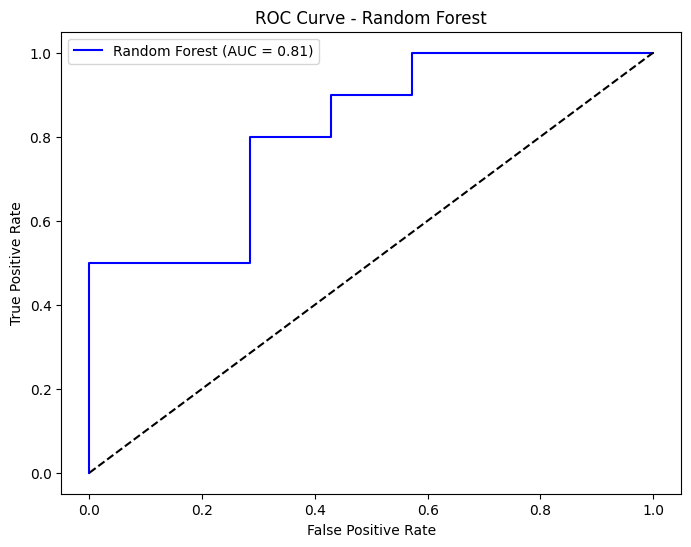

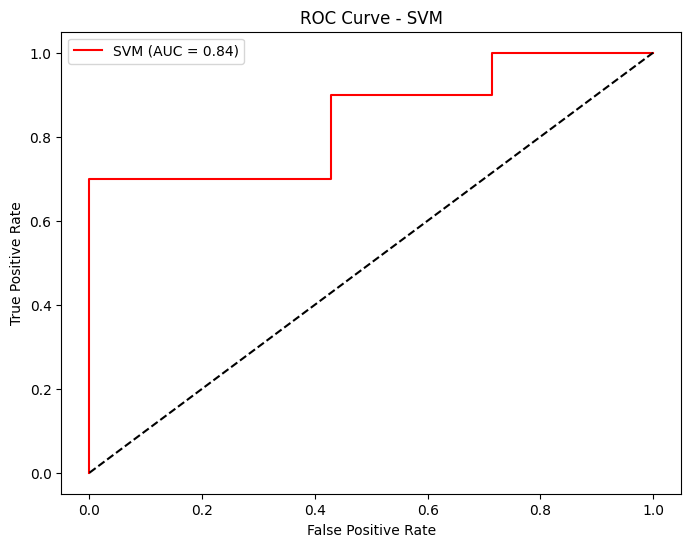


Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.71      0.71         7
           1       0.80      0.80      0.80        10

    accuracy                           0.76        17
   macro avg       0.76      0.76      0.76        17
weighted avg       0.76      0.76      0.76        17


SVM Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.43      0.55         7
           1       0.69      0.90      0.78        10

    accuracy                           0.71        17
   macro avg       0.72      0.66      0.66        17
weighted avg       0.72      0.71      0.68        17


Random Forest 10-Fold CV Accuracy: 0.73 ± 0.15
SVM 10-Fold CV Accuracy: 0.77 ± 0.19


In [18]:
#Random forest (seperate)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# Load dataset
file_path = "Merged_HIV_Data_ML.csv"  # Update with the correct file path
df = pd.read_csv(file_path)

# Drop unnecessary column (if present)
df = df.drop(columns=["Unnamed: 0"], errors='ignore')

# Set ID_REF as index if needed
df.set_index("ID_REF", inplace=True)

# Define features (X) and labels (y)
X = df.T  # Transpose so that rows are samples and columns are features
y = [0] * 34 + [1] * (X.shape[0] - 34)  # 0 for Control, 1 for HIV

# Handle missing values by replacing NaNs with the mean of each column
imputer = SimpleImputer(strategy="mean")
X_imputed = imputer.fit_transform(X)
X = pd.DataFrame(X_imputed, columns=[f"Feature_{i}" for i in range(X_imputed.shape[1])])

# Feature Scaling (Important for SVM)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Hyperparameter tuning using GridSearchCV
rf_params = {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]}
svm_params = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}

rf_model = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=5, scoring='accuracy')
svm_model = GridSearchCV(SVC(probability=True, class_weight='balanced', random_state=42), svm_params, cv=5, scoring='accuracy')

# Train models on training data
rf_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)

# Best models after tuning
rf_best = rf_model.best_estimator_
svm_best = svm_model.best_estimator_

# Make predictions on the test set
rf_preds = rf_best.predict(X_test)
svm_preds = svm_best.predict(X_test)

# Get probability estimates for ROC curve
rf_probs = rf_best.predict_proba(X_test)[:, 1]
svm_probs = svm_best.predict_proba(X_test)[:, 1]

# Compute confusion matrices
rf_cm = confusion_matrix(y_test, rf_preds)
svm_cm = confusion_matrix(y_test, svm_preds)

# Generate classification reports
rf_report = classification_report(y_test, rf_preds)
svm_report = classification_report(y_test, svm_preds)

# Plot ROC Curve for Random Forest
plt.figure(figsize=(8, 6))
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probs)
auc_rf = auc(fpr_rf, tpr_rf)
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.2f})", color='blue')
plt.plot([0, 1], [0, 1], "k--")  # Random classifier line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.show()

# Plot ROC Curve for SVM
plt.figure(figsize=(8, 6))
fpr_svm, tpr_svm, _ = roc_curve(y_test, svm_probs)
auc_svm = auc(fpr_svm, tpr_svm)
plt.plot(fpr_svm, tpr_svm, label=f"SVM (AUC = {auc_svm:.2f})", color='red')
plt.plot([0, 1], [0, 1], "k--")  # Random classifier line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - SVM")
plt.legend()
plt.show()

# Print classification reports
print("\nRandom Forest Classification Report:\n", rf_report)
print("\nSVM Classification Report:\n", svm_report)

# K-Fold Cross Validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
rf_cv_scores = cross_val_score(rf_best, X_scaled, y, cv=cv, scoring='accuracy')
svm_cv_scores = cross_val_score(svm_best, X_scaled, y, cv=cv, scoring='accuracy')

print(f"\nRandom Forest 10-Fold CV Accuracy: {rf_cv_scores.mean():.2f} ± {rf_cv_scores.std():.2f}")
print(f"SVM 10-Fold CV Accuracy: {svm_cv_scores.mean():.2f} ± {svm_cv_scores.std():.2f}")


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['!series_matrix_table_end']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/var/folders/y1/2csyqmsj699cfl3n1r9q73c00000gn/T/ipykernel_15031/647111146.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Gene_ID', data=feature_importances, palette='coolwarm')


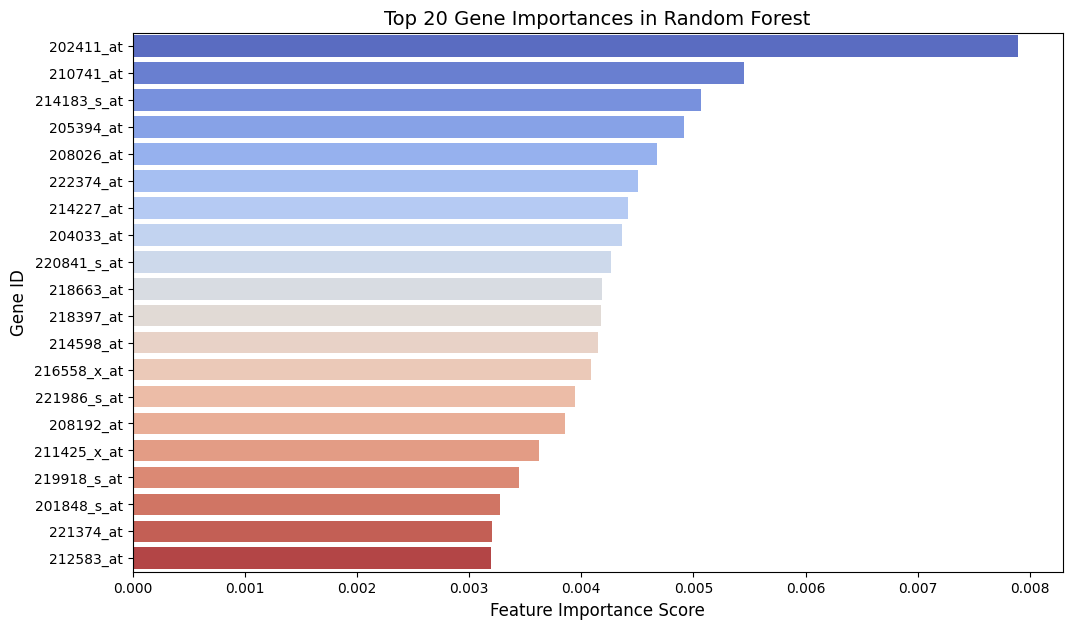

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Load dataset
file_path = "Merged_HIV_Data_ML.csv"
df = pd.read_csv(file_path)

# Drop unnecessary column (if present)
df = df.drop(columns=["Unnamed: 0"], errors='ignore')

# Set ID_REF as index
X = df.set_index("ID_REF").T  # Transpose so that rows are samples and columns are features
y = [0] * 34 + [1] * (X.shape[0] - 34)  # 0 for Control, 1 for HIV

# Handle missing values by replacing NaNs with the mean of each column
imputer = SimpleImputer(strategy="mean")
X_imputed = imputer.fit_transform(X)
X = pd.DataFrame(X_imputed, columns=X.columns[:X_imputed.shape[1]], index=X.index)

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Train Random Forest Model
rf_best = RandomForestClassifier(n_estimators=200, max_depth=20, min_samples_split=5, random_state=42)
rf_best.fit(X_train, y_train)

# Feature Importance Analysis
feature_importances = pd.DataFrame({'Gene_ID': X.columns, 'Importance': rf_best.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False).head(20)

# Plot Feature Importance with Gene IDs
plt.figure(figsize=(12, 7))
sns.barplot(x='Importance', y='Gene_ID', data=feature_importances, palette='coolwarm')
plt.title("Top 20 Gene Importances in Random Forest", fontsize=14)
plt.xlabel("Feature Importance Score", fontsize=12)
plt.ylabel("Gene ID", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()



In [6]:
pip install mygene

1231245.46s - pydevd: Sending message related to process being replaced timed-out after 5 seconds



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: pip3.12 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
3 input query terms found dup hits:	[('208026_at', 2), ('216558_x_at', 7), ('211425_x_at', 2)]
2 input query terms found no hit:	['214227_at', '208192_at']
/var/folders/y1/2csyqmsj699cfl3n1r9q73c00000gn/T/ipykernel_15031/1973758762.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Gene_Symbol', data=feature_importances, palette='coolwarm')


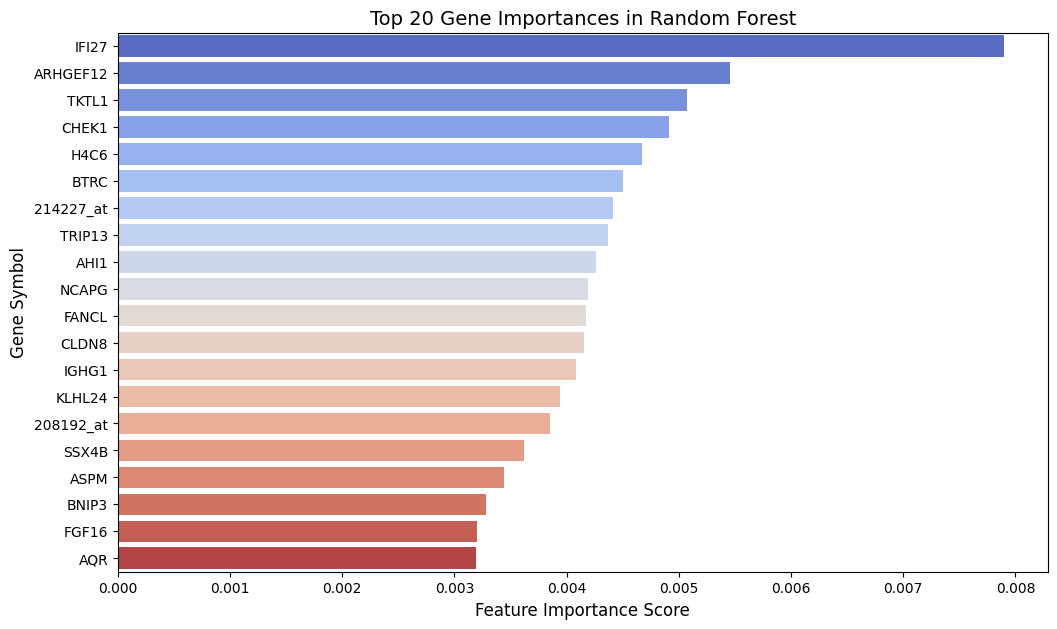

In [7]:
from mygene import MyGeneInfo

# Initialize MyGeneInfo API
mg = MyGeneInfo()

# Query gene symbols for the top 20 Gene IDs
gene_symbols = mg.querymany(feature_importances['Gene_ID'].tolist(), scopes="reporter", fields="symbol", species="human")

# Create a mapping dictionary for Gene Symbols
gene_mapping = {item['query']: item.get('symbol', item['query']) for item in gene_symbols}
feature_importances['Gene_Symbol'] = feature_importances['Gene_ID'].map(gene_mapping)

# Plot Feature Importance with Gene Symbols
plt.figure(figsize=(12, 7))
sns.barplot(x='Importance', y='Gene_Symbol', data=feature_importances, palette='coolwarm')
plt.title("Top 20 Gene Importances in Random Forest", fontsize=14)
plt.xlabel("Feature Importance Score", fontsize=12)
plt.ylabel("Gene Symbol", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['!series_matrix_table_end']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


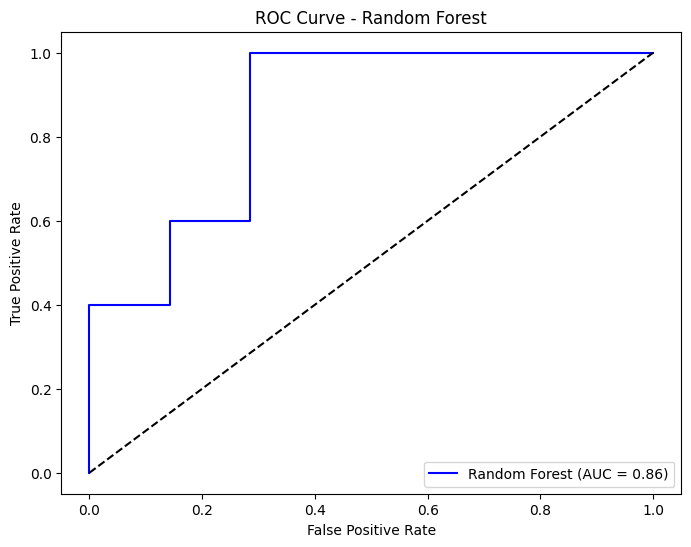

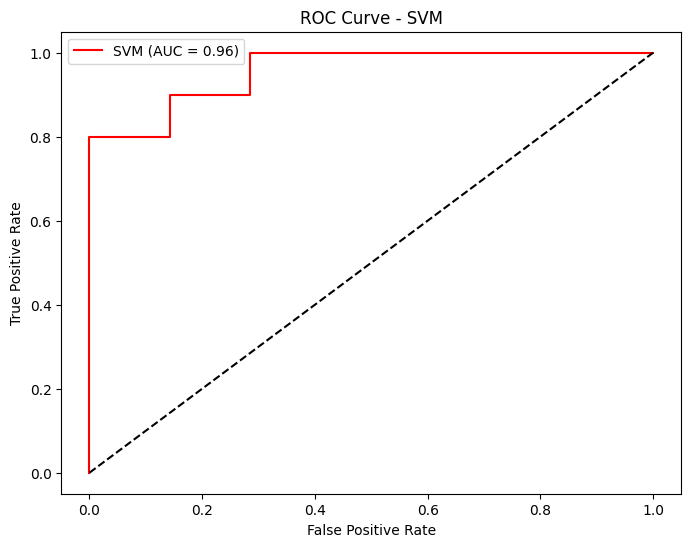


Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.71      0.71         7
           1       0.80      0.80      0.80        10

    accuracy                           0.76        17
   macro avg       0.76      0.76      0.76        17
weighted avg       0.76      0.76      0.76        17


SVM Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86         7
           1       0.90      0.90      0.90        10

    accuracy                           0.88        17
   macro avg       0.88      0.88      0.88        17
weighted avg       0.88      0.88      0.88        17


Random Forest 10-Fold CV Accuracy: 0.77 ± 0.17
SVM 10-Fold CV Accuracy: 0.93 ± 0.08


In [17]:
#SVM (seperate)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.utils import resample
from sklearn.feature_selection import SelectFromModel

# Load dataset
file_path = "Merged_HIV_Data_ML.csv"  # Update with the correct file path
df = pd.read_csv(file_path)

# Drop unnecessary column (if present)
df = df.drop(columns=["Unnamed: 0"], errors='ignore')

# Set ID_REF as index if needed
df.set_index("ID_REF", inplace=True)

# Define features (X) and labels (y)
X = df.T  # Transpose so that rows are samples and columns are features
y = np.array([0] * 34 + [1] * (X.shape[0] - 34))  # 0 for Control, 1 for HIV

# Handle missing values by replacing NaNs with the mean of each column
imputer = SimpleImputer(strategy="mean")
X_imputed = imputer.fit_transform(X)
X = pd.DataFrame(X_imputed, columns=[f"Feature_{i}" for i in range(X_imputed.shape[1])])

# Feature Scaling (Important for SVM)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Feature Selection using Random Forest
rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=500, random_state=42))
rf_selector.fit(X_scaled, y)
X_selected = rf_selector.transform(X_scaled)

# Split dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42, stratify=y)

# Apply Random Oversampling to balance the dataset
X_train_0 = X_train[y_train == 0]
y_train_0 = y_train[y_train == 0]
X_train_1 = X_train[y_train == 1]
y_train_1 = y_train[y_train == 1]

X_train_0_over, y_train_0_over = resample(X_train_0, y_train_0, replace=True, n_samples=len(y_train_1), random_state=42)

X_train_balanced = np.vstack((X_train_0_over, X_train_1))
y_train_balanced = np.hstack((y_train_0_over, y_train_1))

# Hyperparameter tuning using GridSearchCV
rf_params = {
    'n_estimators': [200, 300, 500],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt']
}
svm_params = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto'],
    'class_weight': [{0: 2, 1: 1}]
}

rf_model = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=5, scoring='accuracy')
svm_model = GridSearchCV(SVC(probability=True, random_state=42), svm_params, cv=5, scoring='accuracy')

# Train models on balanced training data
rf_model.fit(X_train_balanced, y_train_balanced)
svm_model.fit(X_train_balanced, y_train_balanced)

# Best models after tuning
rf_best = rf_model.best_estimator_
svm_best = svm_model.best_estimator_

# Make predictions on the test set
rf_preds = rf_best.predict(X_test)
svm_preds = svm_best.predict(X_test)

# Get probability estimates for ROC curve
rf_probs = rf_best.predict_proba(X_test)[:, 1]
svm_probs = svm_best.predict_proba(X_test)[:, 1]

# Compute confusion matrices
rf_cm = confusion_matrix(y_test, rf_preds)
svm_cm = confusion_matrix(y_test, svm_preds)

# Generate classification reports
rf_report = classification_report(y_test, rf_preds)
svm_report = classification_report(y_test, svm_preds)

# Plot ROC Curve for Random Forest
plt.figure(figsize=(8, 6))
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probs)
auc_rf = auc(fpr_rf, tpr_rf)
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.2f})", color='blue')
plt.plot([0, 1], [0, 1], "k--")  # Random classifier line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.show()

# Plot ROC Curve for SVM
plt.figure(figsize=(8, 6))
fpr_svm, tpr_svm, _ = roc_curve(y_test, svm_probs)
auc_svm = auc(fpr_svm, tpr_svm)
plt.plot(fpr_svm, tpr_svm, label=f"SVM (AUC = {auc_svm:.2f})", color='red')
plt.plot([0, 1], [0, 1], "k--")  # Random classifier line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - SVM")
plt.legend()
plt.show()

# Print classification reports
print("\nRandom Forest Classification Report:\n", rf_report)
print("\nSVM Classification Report:\n", svm_report)

# K-Fold Cross Validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
rf_cv_scores = cross_val_score(rf_best, X_selected, y, cv=cv, scoring='accuracy')
svm_cv_scores = cross_val_score(svm_best, X_selected, y, cv=cv, scoring='accuracy')

print(f"\nRandom Forest 10-Fold CV Accuracy: {rf_cv_scores.mean():.2f} ± {rf_cv_scores.std():.2f}")
print(f"SVM 10-Fold CV Accuracy: {svm_cv_scores.mean():.2f} ± {svm_cv_scores.std():.2f}")


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['!series_matrix_table_end']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


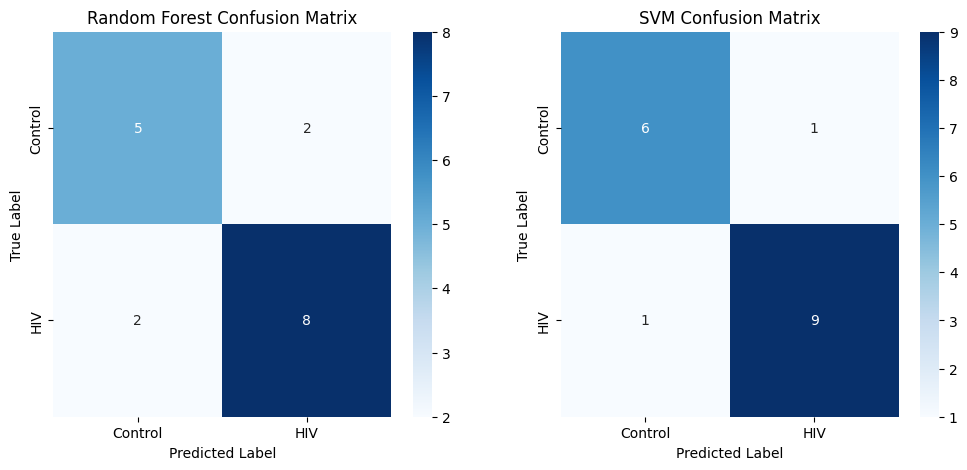


Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.71      0.71         7
           1       0.80      0.80      0.80        10

    accuracy                           0.76        17
   macro avg       0.76      0.76      0.76        17
weighted avg       0.76      0.76      0.76        17


SVM Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86         7
           1       0.90      0.90      0.90        10

    accuracy                           0.88        17
   macro avg       0.88      0.88      0.88        17
weighted avg       0.88      0.88      0.88        17


Random Forest 10-Fold CV Accuracy: 0.77 ± 0.17
SVM 10-Fold CV Accuracy: 0.93 ± 0.08


In [16]:
#SVM    

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.utils import resample
from sklearn.feature_selection import SelectFromModel

# Load dataset
file_path = "Merged_HIV_Data_ML.csv"  # Update with the correct file path
df = pd.read_csv(file_path)

# Drop unnecessary column (if present)
df = df.drop(columns=["Unnamed: 0"], errors='ignore')

# Set ID_REF as index if needed
df.set_index("ID_REF", inplace=True)

# Define features (X) and labels (y)
X = df.T  # Transpose so that rows are samples and columns are features
y = np.array([0] * 34 + [1] * (X.shape[0] - 34))  # 0 for Control, 1 for HIV

# Handle missing values by replacing NaNs with the mean of each column
imputer = SimpleImputer(strategy="mean")
X_imputed = imputer.fit_transform(X)
X = pd.DataFrame(X_imputed, columns=[f"Feature_{i}" for i in range(X_imputed.shape[1])])

# Feature Scaling (Important for SVM)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Feature Selection using Random Forest
rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=500, random_state=42))
rf_selector.fit(X_scaled, y)
X_selected = rf_selector.transform(X_scaled)

# Split dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42, stratify=y)

# Apply Random Oversampling to balance the dataset
X_train_0 = X_train[y_train == 0]
y_train_0 = y_train[y_train == 0]
X_train_1 = X_train[y_train == 1]
y_train_1 = y_train[y_train == 1]

X_train_0_over, y_train_0_over = resample(X_train_0, y_train_0, replace=True, n_samples=len(y_train_1), random_state=42)

X_train_balanced = np.vstack((X_train_0_over, X_train_1))
y_train_balanced = np.hstack((y_train_0_over, y_train_1))

# Hyperparameter tuning using GridSearchCV
rf_params = {
    'n_estimators': [200, 300, 500],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt']
}
svm_params = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto'],
    'class_weight': [{0: 2, 1: 1}]
}

rf_model = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=5, scoring='accuracy')
svm_model = GridSearchCV(SVC(probability=True, random_state=42), svm_params, cv=5, scoring='accuracy')

# Train models on balanced training data
rf_model.fit(X_train_balanced, y_train_balanced)
svm_model.fit(X_train_balanced, y_train_balanced)

# Best models after tuning
rf_best = rf_model.best_estimator_
svm_best = svm_model.best_estimator_

# Make predictions on the test set
rf_preds = rf_best.predict(X_test)
svm_preds = svm_best.predict(X_test)

# Get probability estimates for ROC curve
rf_probs = rf_best.predict_proba(X_test)[:, 1]
svm_probs = svm_best.predict_proba(X_test)[:, 1]

# Compute confusion matrices
rf_cm = confusion_matrix(y_test, rf_preds)
svm_cm = confusion_matrix(y_test, svm_preds)

# Generate classification reports
rf_report = classification_report(y_test, rf_preds)
svm_report = classification_report(y_test, svm_preds)

# Plot Confusion Matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(rf_cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Control", "HIV"], yticklabels=["Control", "HIV"], ax=axes[0])
axes[0].set_title("Random Forest Confusion Matrix")
axes[0].set_xlabel("Predicted Label")
axes[0].set_ylabel("True Label")

sns.heatmap(svm_cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Control", "HIV"], yticklabels=["Control", "HIV"], ax=axes[1])
axes[1].set_title("SVM Confusion Matrix")
axes[1].set_xlabel("Predicted Label")
axes[1].set_ylabel("True Label")
plt.show()

# Print classification reports
print("\nRandom Forest Classification Report:\n", rf_report)
print("\nSVM Classification Report:\n", svm_report)

# K-Fold Cross Validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
rf_cv_scores = cross_val_score(rf_best, X_selected, y, cv=cv, scoring='accuracy')
svm_cv_scores = cross_val_score(svm_best, X_selected, y, cv=cv, scoring='accuracy')

print(f"\nRandom Forest 10-Fold CV Accuracy: {rf_cv_scores.mean():.2f} ± {rf_cv_scores.std():.2f}")
print(f"SVM 10-Fold CV Accuracy: {svm_cv_scores.mean():.2f} ± {svm_cv_scores.std():.2f}")
